# Plot data to explain method


In [1]:
import sys, os
import glob 
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import collections
import builtins

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from scipy.integrate import odeint #this is the module to solve ODEs

import met_brewer

%matplotlib inline
import scipy.stats 
import json

import csv
from collections import defaultdict
from pprint import pprint


################################
#load information of species to include
#################################
#load species information for all characterized species
speciesinformation=pd.read_csv("data_hplc/species_properties.csv",skiprows=1)
display(speciesinformation.head())



,species_HPLCname,species,new_species,species.1,species_short,new_genus,genus,new_family,family,new_order,order,new_class,class,new_phylum,phylum
0,B.uniformis,Bacteroides uniformis,Bacteroides uniformis,Bacteroides uniformis,B. uniformis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
1,B.fragilis,Bacteroides fragilis,Bacteroides fragilis,Bacteroides fragilis,B. fragilis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
2,B.ovatus,Bacteroides ovatus,Bacteroides ovatus,Bacteroides ovatus,B. ovatus,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
3,B.theta,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,B. theta,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
4,B.finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,B. finegoldii,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes


# Read in data

In [6]:
###################
#decide what to plot
####################

#use a table with average values  (to generate this table, run Final_analysis_hplcdata.ipynb
dataout_av=pd.read_csv("data_hplc/analysis_out_av.csv")
display(dataout_av.head())
display(speciesinformation.head())

#sort list manually 
sorter=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR","E.halli"]

sorter=[]
sorter=sorter+["B.uniformis","B.fragilis","B.ovatus","B.theta","B.finegoldii"]
sorter=sorter+["B.vulgatus"]
sorter=sorter+["P.copri"]
sorter=sorter+["P.distastonis"]
sorter=sorter+["R.intestinalis","E.rectale","L.eligens","D.longicatena","F.saccharivorans","B.wexleri","B.hydrogenotrophica"]
sorter=sorter+["F.prausnitzii","E.siraeum","R.bromii"]
sorter=sorter+["B.longum","B.adolescentis"]
sorter=sorter+["C.aerofaciens"]
sorter=sorter+["E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR"]


dataout_av.sort_values(by="species", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

display(dataout_av)

speciesall=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli"]

samplenamelist=[[],[],[],[]]
for species in speciesall:
    mc=-1
    for medium in ["e","BHI","simple","YCA"]:
            mc=mc+1
            selectc=dataout_av.loc[(dataout_av["experiment_short"]=="av") & (dataout_av["species"]==species) & (dataout_av["medium"]==medium)]
            #print(selectc)
            for il in range(0,selectc.shape[0]):
                samplenamelist[mc].append(selectc["exp_number"].iloc[il])
print("list output")
for mc in range(0,len(samplenamelist)):
    print(samplenamelist[mc])

print(samplenamelist[3])

sublistshort=['glu','mal','ace','but','for','lac','pro','suc']

#tol bright https://personal.sron.nl/~pault/#sec:qualitative, glucose added as black
colorlist=['#5d5d5d','#BBBBBB','#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377']
#colorlist=['#dd5129', '#1e8b99', '#2c7591', '#85635d', '#34a28d', '#fab255', '#acb269', '#5db27d']
#colorlist=['#dd5129', '#85635d', '#2c7591', '#34a28d', '#fab255','#5db27d', '#1e8b99','#acb269']
sublist=['glucose','maltose','acetate','butyrate','formate','lactate','propionate','succinate'] #skipp ethanol here
sublistshort=['glu','mal','ace','but','for','lac','pro','suc']



markerlist=['s','h','v','^','<','>','d','o']
energycontent=np.array([0.68,1.36,0.21,0.52,0.,.33,0.37,0.36]) #kcal/mmol #the energy per mm for different fermentation products3
cfactorlist=[6,12,2,4,1,3,3,4]
markerlist=['s','v','^','<','>','d','o','h']



,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
0,0,0.0,29.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,33,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,45.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,51,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,38.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,42,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,143.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,199,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,142.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,198,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,species_HPLCname,species,new_species,species.1,species_short,new_genus,genus,new_family,family,new_order,order,new_class,class,new_phylum,phylum
0,B.uniformis,Bacteroides uniformis,Bacteroides uniformis,Bacteroides uniformis,B. uniformis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
1,B.fragilis,Bacteroides fragilis,Bacteroides fragilis,Bacteroides fragilis,B. fragilis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
2,B.ovatus,Bacteroides ovatus,Bacteroides ovatus,Bacteroides ovatus,B. ovatus,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
3,B.theta,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,B. theta,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
4,B.finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,B. finegoldii,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
182,182,NaN,NaN,NaN,ATCC8492,B.uniformis,"av [25, 24, 23]_used_only: [59.0, 60.0, 61.0]",av,av_B.uniformis_ATCC8492_YCA,YCA,...,5.682633e-16,0.417771,0.016282,0.112282,0.000000,19.522489,0.447882,-6.650701,0.217517,0.048445
56,56,67.0,20.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,23,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,66.0,21.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,24,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,54,65.0,22.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,25,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,20.0,14.0,NaN,ATCC25285,B.fragilis,analysis_stan_YCA_230607_2.5mM,analysis_stan_YCA_230607_2.5mM,17,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,119.0,106.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_Oct22.csv,150,epsilon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,120.0,104.0,NaN,NCM3722,E.coli,NaN,analysis_stan_simple.csv,146,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,121.0,86.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_wotrp_Oct22.csv,112,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,194,NaN,NaN,NaN,NCM3722,E.coli,"av [162, 150]_used_only: [111.0, 113.0]",av,av_E.coli_NCM3722_epsilon,epsilon,...,5.784812e-01,0.632041,0.000000,0.371618,0.028349,20.556771,0.795447,-5.493158,0.613745,0.508830


list output
[]
['av_B.vulgatus_DSM 1447_BHI', 'av_B.fragilis_ATCC25285_BHI', 'av_B.ovatus_ATCC8483_BHI', 'av_B.theta_ATCC29148_BHI', 'av_B.finegoldii_HM-727_BHI', 'av_P.distastonis_HM-169_BHI', 'av_E.rectale_ATCC33656_BHI', 'av_R.intestinalis_DSM14610_BHI', 'av_F.prausnitzii_DSM17677_BHI', 'av_B.longum_DSM20219_BHI', 'av_B.adolescentis_DSM20083_BHI', 'av_C.aerofaciens_DSM3979_BHI', 'av_E.coli_NCM3722_BHI']
[]
['av_B.vulgatus_DSM 1447_YCA', 'av_B.fragilis_ATCC25285_YCA', 'av_B.ovatus_ATCC8483_YCA', 'av_B.theta_ATCC29148_YCA', 'av_B.finegoldii_HM-727_YCA', 'av_B.uniformis_ATCC8492_YCA', 'av_P.copri_DSM18205_YCA', 'av_P.distastonis_HM-169_YCA', 'av_E.rectale_ATCC33656_YCA', 'av_R.intestinalis_DSM14610_YCA', 'av_F.prausnitzii_DSM17677_YCA', 'av_R.bromii_ATCC27255_YCA', 'av_B.longum_DSM20219_YCA', 'av_B.adolescentis_DSM20083_YCA', 'av_C.aerofaciens_DSM3979_YCA', 'av_E.coli_NCM3722_YCA']
['av_B.vulgatus_DSM 1447_YCA', 'av_B.fragilis_ATCC25285_YCA', 'av_B.ovatus_ATCC8483_YCA', 'av_B.theta_ATC

# plot repeats ets for one example with chromotograms...

In [11]:
###################
#decide what to plot
####################

#use a table with average values  (to generate this table, run Final_analysis_hplcdata.ipynb
dataout_av=pd.read_csv("data_hplc/analysis_out_av.csv")
display(dataout_av.head())
display(speciesinformation.head())

#sort list manually 


sorter=["B.vulgatus","B.fragilis","B.ovatus","B.theta","B.finegoldii","B.uniformis",'P.copri','P.distastonis',"E.rectale","R.intestinalis","F.prausnitzii","R.bromii","B.longum","B.adolescentis","C.aerofaciens","E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR","E.halli"]

sorter=[]
sorter=sorter+["B.uniformis","B.fragilis","B.ovatus","B.theta","B.finegoldii"]
sorter=sorter+["B.vulgatus"]
sorter=sorter+["P.copri"]
sorter=sorter+["P.distastonis"]
sorter=sorter+["R.intestinalis","E.rectale","L.eligens","D.longicatena","F.saccharivorans","B.wexleri","B.hydrogenotrophica"]
sorter=sorter+["F.prausnitzii","E.siraeum","R.bromii"]
sorter=sorter+["B.longum","B.adolescentis"]
sorter=sorter+["C.aerofaciens"]
sorter=sorter+["E.coli","E.coliI","E.coliII","Fecal","FecalPP","ECOR"]

dataout_av.sort_values(by="species", key=lambda column: column.map(lambda e: sorter.index(e)), inplace=True)

display(dataout_av)

#speciesall=speciesinformation["species_HPLCname"]
speciesall=sorter[:16]

media=["YCA"]
#'BHI', 'YCA', 'epsilon plus', 'simple', 'epsilon', 'fecal
print(media)
samplenamelist=[]
for m in media:
    samplenamelist.append([])

for species in speciesall:
    mc=-1
    for medium in media:
            mc=mc+1
            selectc=dataout_av.loc[(dataout_av["experiment_short"]=="av") & (dataout_av["species"]==species) & (dataout_av["medium"]==medium)]
            #print(selectc)
            for il in range(0,selectc.shape[0]):
                samplenamelist[mc].append(selectc["exp_number"].iloc[il])
            if selectc.shape[0]>1:
                print("error - more than one entry")
                display( selectc)
                error


print("list output")
for mc in range(0,len(samplenamelist)):
    print(samplenamelist[mc])



   

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
0,0,0.0,29.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,33,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.0,45.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,51,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,38.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,42,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3.0,143.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,199,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4.0,142.0,NaN,DSM20083,B.adolescentis,NaN,stan_BHI_30Dec22,198,BHI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,species_HPLCname,species,new_species,species.1,species_short,new_genus,genus,new_family,family,new_order,order,new_class,class,new_phylum,phylum
0,B.uniformis,Bacteroides uniformis,Bacteroides uniformis,Bacteroides uniformis,B. uniformis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
1,B.fragilis,Bacteroides fragilis,Bacteroides fragilis,Bacteroides fragilis,B. fragilis,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
2,B.ovatus,Bacteroides ovatus,Bacteroides ovatus,Bacteroides ovatus,B. ovatus,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
3,B.theta,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,Bacteroides thetaiotaomicron,B. theta,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes
4,B.finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,Bacteroides finegoldii,B. finegoldii,Bacteroides,Bacteroides,Bacteroidaceae,Bacteroidaceae,Bacteroidales,Bacteroidales,Bacteroidia,Bacteroidia,Bacteroidota,Bacteroidetes


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
182,182,NaN,NaN,NaN,ATCC8492,B.uniformis,"av [25, 24, 23]_used_only: [59.0, 60.0, 61.0]",av,av_B.uniformis_ATCC8492_YCA,YCA,...,5.682633e-16,0.417771,0.016282,0.112282,0.000000,19.522489,0.447882,-6.650701,0.217517,0.048445
56,56,67.0,20.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,23,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,66.0,21.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,24,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,54,65.0,22.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,25,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,20.0,14.0,NaN,ATCC25285,B.fragilis,analysis_stan_YCA_230607_2.5mM,analysis_stan_YCA_230607_2.5mM,17,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,119.0,106.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_Oct22.csv,150,epsilon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,120.0,104.0,NaN,NCM3722,E.coli,NaN,analysis_stan_simple.csv,146,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,121.0,86.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_wotrp_Oct22.csv,112,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,194,NaN,NaN,NaN,NCM3722,E.coli,"av [162, 150]_used_only: [111.0, 113.0]",av,av_E.coli_NCM3722_epsilon,epsilon,...,5.784812e-01,0.632041,0.000000,0.371618,0.028349,20.556771,0.795447,-5.493158,0.613745,0.508830


['YCA']
list output
['av_B.uniformis_ATCC8492_YCA', 'av_B.fragilis_ATCC25285_YCA', 'av_B.ovatus_ATCC8483_YCA', 'av_B.theta_ATCC29148_YCA', 'av_B.finegoldii_HM-727_YCA', 'av_B.vulgatus_DSM 1447_YCA', 'av_P.copri_DSM18205_YCA', 'av_P.distastonis_HM-169_YCA', 'av_R.intestinalis_DSM14610_YCA', 'av_E.rectale_ATCC33656_YCA', 'av_L.eligens_L.eligens_YCA', 'av_D.longicatena_D.longicatena_YCA', 'av_F.saccharivorans_F.saccharivorans_YCA', 'av_B.wexleri_B.wexleri_YCA', 'av_B.hydrogenotrophica_B.hydrogenotrophica_YCA', 'av_F.prausnitzii_DSM17677_YCA']


YCA


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
182,182,NaN,NaN,NaN,ATCC8492,B.uniformis,"av [25, 24, 23]_used_only: [59.0, 60.0, 61.0]",av,av_B.uniformis_ATCC8492_YCA,YCA,...,5.682633e-16,0.417771,0.016282,0.112282,0.000000,19.522489,0.447882,-6.650701,0.217517,0.048445
56,56,67.0,20.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,23,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,66.0,21.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,24,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,54,65.0,22.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,25,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,20.0,14.0,NaN,ATCC25285,B.fragilis,analysis_stan_YCA_230607_2.5mM,analysis_stan_YCA_230607_2.5mM,17,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,119.0,106.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_Oct22.csv,150,epsilon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,97,120.0,104.0,NaN,NCM3722,E.coli,NaN,analysis_stan_simple.csv,146,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,98,121.0,86.0,NaN,NCM3722,E.coli,NaN,analysis_stan_eplus_wotrp_Oct22.csv,112,gamma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,194,NaN,NaN,NaN,NCM3722,E.coli,"av [162, 150]_used_only: [111.0, 113.0]",av,av_E.coli_NCM3722_epsilon,epsilon,...,5.784812e-01,0.632041,0.000000,0.371618,0.028349,20.556771,0.795447,-5.493158,0.613745,0.508830


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
56,56,67.0,20.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,23,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,55,66.0,21.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,24,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,54,65.0,22.0,NaN,ATCC8492,B.uniformis,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,25,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,20.0,14.0,NaN,ATCC25285,B.fragilis,analysis_stan_YCA_230607_2.5mM,analysis_stan_YCA_230607_2.5mM,17,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,18.0,2.0,NaN,ATCC25285,B.fragilis,analysis_stan_YCA_230424_2.5mM,analysis_stan_YCA_230424_2.5mM,3,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,79,102.0,30.0,NaN,DSM3979,C.aerofaciens,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,34,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,76,99.0,43.0,NaN,DSM3979,C.aerofaciens,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,49,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,91,114.0,19.0,NaN,NCM3722,E.coli,analysis_stan_YCA_230712_2.5mM,analysis_stan_YCA_230712_2.5mM,22,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,93,116.0,1.0,NaN,NCM3722,E.coli,analysis_stan_YCA_230424_2.5mM,analysis_stan_YCA_230424_2.5mM,2,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
1,1,1.0,45.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,51,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,0.0,29.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,33,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2.0,38.0,NaN,DSM20083,B.adolescentis,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,42,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


********** Strain:
DSM20083
['0.089', ' 0.129', ' 0.189', ' 0.295', ' 0.437', ' 0.517', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.516666667', ' 1.066666667', ' 1.716666667', ' 2.333333333', ' 2.766666667', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.055', ' 0.089', ' 0.112', ' 0.172', ' 0.21', ' 0.278', ' 0.393', ' 0.5', ' 0.563', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.516666667', ' 0.85', ' 1.533333333', ' 1.9', ' 2.333333333', ' 3.0', ' 3.366666667', ' 3.583333333', ' nan', ' nan', ' nan', ' nan']
['0.141', ' 0.274', ' 0.3', ' 0.383', ' 0.433', ' 0.533', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
['0.0', ' 0.766666667', ' 1.1', ' 1.433333333', ' 1.683333333', ' 1.85', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan', ' nan']
[[8.880348863401624, 6.983131802616277, 8.853173988433403], [-0.0, -0.0, -0.0], [10.558169713153124, 13.580201569555198, 12.2039671076068], [], [0.0, 2.6301725044379856, 0.3667206961814968], [2.92008601676

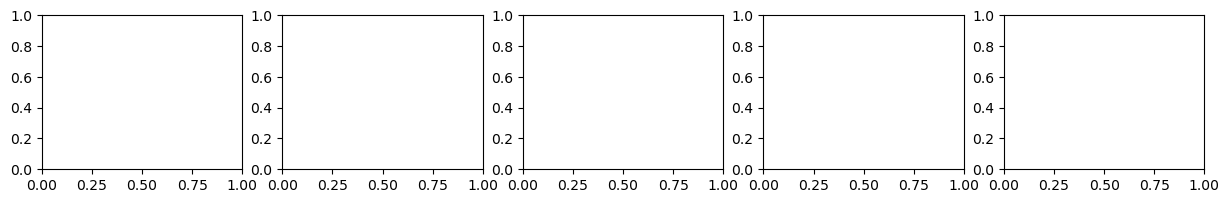

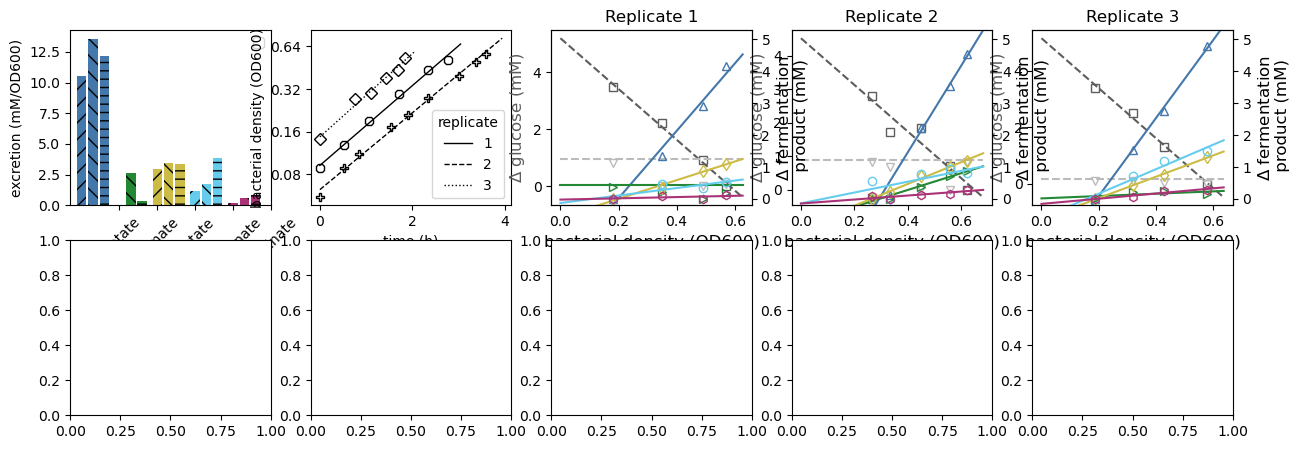

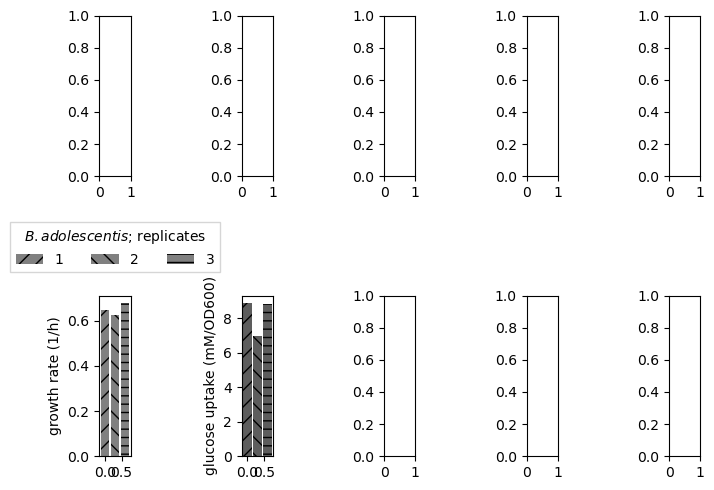

In [12]:

#plot concentration vs OD
####################


for medium in media:
    print(medium)
    display(dataout_av)
    select=dataout_av.loc[(dataout_av["use_in_study"]=="yes") & (dataout_av["experiment_short"]!="av") &  (dataout_av["medium"]==medium) ]
    display(select)

    select=select.sort_values(by=["strain"])

    strains=select["strain"].unique()
    
    strains=["DSM20083"]
    num_strains=len(strains)

    if num_strains>0:
        #for index,row in select.iterrows():

        fontsize=12
        fig, ax = plt.subplots(num_strains,5,figsize=(5*3,2*num_strains))  #for barplots yields/excretion
        if num_strains==1:
            fig, ax = plt.subplots(2,5,figsize=(5*3,2.5*2))  #for barplots yields/excretion
        fig2, ax2 = plt.subplots(2,5,figsize=(5*1.4,2.5*2))  #for barplots yields/excretion
        
        axGR=ax2[1,0]
        markerlistgr=["8","P","D"]
        linestylegr=["-","--",":"]
        hatch=["//","\\\\","--"]
        iS=-1
        for strain in strains:




            FPvalues=[]
            iS=iS+1
            results=[[],[],[],[],[],[],[],[]]

            select2=select.loc[select["strain"]==strain]
            display(select2)
            specieslistcc=select2["species"].tolist()[0]


            print("********** Strain:")
            print(strain)
            #display(select2)

            gr=[]


            axTW=[]
            #go through all repeats of strains
            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1

                #prepare plot
                if iA<3:
                    axTW.append(ax[iS,iA+2].twinx())
                    if strain in ["DSM17677","ATCC27255","DSM15702"]:
                        ax[iS,iA+2].set_ylabel("$\Delta $ maltose (mM)",fontsize=fontsize,color='#BBBBBB')
                    else:
                        ax[iS,iA+2].set_ylabel("$\Delta $ glucose (mM)",fontsize=fontsize,color='#5d5d5d')
                    axTW[iA].set_ylabel("$\Delta $ fermentation\n product (mM)",fontsize=fontsize)
                    ax[iS,iA+2].set_xlabel("bacterial density (OD600)",fontsize=fontsize)

                    #plot OD
                    gr.append(row["growth_rate"])

                    try:
                        odcc=row["growthcurve_OD"][1:-1].split(",")
                        timecc=row["growthcurve_time"][1:-1].split(",")
                        print(odcc)
                        print(timecc)
                        odcc=np.array(odcc,dtype=float)
                        timecc=np.array(timecc,dtype=float)

                        odcc = odcc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(timecc)]
                        timecc = timecc[~np.isnan(odcc)]
                        odcc = odcc[~np.isnan(odcc)]

                        fitgr=np.polyfit(timecc,np.log(odcc),1)
                        odcc_range=np.linspace(0,np.nanmax(1.1*timecc),50)
                        ax[iS,1].plot(odcc_range,np.exp(odcc_range*fitgr[0]+fitgr[1]),ls=linestylegr[iA],label=iA+1,color="k",lw=1)
                        ax[iS,1].set_yscale("log")
                        ax[iS,1].minorticks_off()
                        ytickod=[0.04,0.08,0.16,0.32,0.64]
                        ax[iS,1].set_yticks(ytickod)
                        ax[iS,1].set_yticklabels(ytickod)
                        ax[iS,1].plot(timecc,odcc,ls='',marker=markerlistgr[iA],color='k',fillstyle="none")
                    except:
                        print("no growth rate data")


                #go through different substrates
                ic=-1
                for sub in sublist:
                    #print(sub)
                    ic=ic+1
                    cfactor=cfactorlist[ic]
                    color=colorlist[ic]
                    label=sublistshort[ic]
                    conversionfactor=1/0.5
                    #print("OD")
                    #print(row[sub+"_OD"])



                    #print(row[sub+"_conc"])
                    if row[sub+"_OD"] in ["nan",np.nan]:
                        pass
                    else:
                        odc=row[sub+"_OD"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        concc=row[sub+"_conc"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
                        odc=np.array(odc,dtype=float)
                        concc=np.array(concc,dtype=float)
                        odcval=np.linspace(0,1.1*np.nanmax(odc),10)
                        m=row[sub]
                        y0=row[sub+"_y0"]

                        if sub not in ["glucose","maltose"]:
                            FPvalues.append(np.nanmax(concc)-concc.min())

                        if iA<3:
                            if sub in ["glucose","maltose"]: # and (strain not in ["DSM17677","ATCC27255"]):
                                ax[iS,iA+2].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                ax[iS,iA+2].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='--')
                                results[ic].append(-1*m)
                            else:
                                    axTW[iA].plot(odc,concc-concc.min(),color=color,ls='',marker=markerlist[ic],fillstyle="none")
                                    axTW[iA].plot(odcval,odcval*m+y0-concc.min(),color=color,label=label,ls='-')
                                    results[ic].append(m)
                            if ic==0:
                                ax[iS,iA+2].set_title("Replicate "+str(iA+1))


            ax[iS,1].legend(title="replicate")
            print(results)

            iA=-1
            for index,row in select2.iterrows():
                iA=iA+1
                if iA<3:
                    try:
                        axTW[iA].set_ylim(-.2,1.1*max(FPvalues))
                    except:
                        pass
                #if iA==0:
                #    ax[0].set_yticklabels(tickl[::-1],fontsize=fontsize)
            ic=-1
            ic2=-1
            for sub in sublist:
                #print(sub)
                ic=ic+1
                if sub in ["acetate","formate","lactate","propionate","succinate"]:
                        ic2=ic2+1
                for iR in [0,1,2]:
                    #print(results)
                    if sub in ["acetate","formate","lactate","propionate","succinate"]:
                        try:
                            ax[iS,0].bar(ic2+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic],hatch=hatch[iR])
                        except:
                            #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                            pass
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR]
                    if sub in ["glucose"]:
                        try:
                            ax2[1,1].bar(iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic],hatch=hatch[iR])
                        except:
                            #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                            pass
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR]
                
            
            ax2[1,0].set_ylabel("growth rate (1/h)")
            ax2[1,1].set_ylabel("glucose uptake (mM/OD600)")
            for iR in [0,1,2]:
                    #print(results)
                    try:
                        ax2[1,0].bar(0+iR*0.3,gr[iR],width=0.25,color="gray",hatch=hatch[iR],label=iR+1)
                    except:
                        #ax[iS,0].bar(ic+iR*0.3,results[ic][iR],width=0.25,color=colorlist[ic])
                        pass
            #axGR.legend(title="replicate")
            ax[iS,0].set_xlim(-0.3,5)
            listxt=np.array(range(0,8))+0.3
            ax[iS,0].set_xticks([1,2,3,4,5])
            ax[iS,0].set_xticklabels(["acetate","formate","lactate","propionate","succinate"],rotation=45) # sublistshort
            ax[iS,0].set_ylabel("excretion (mM/OD600)")

            axGR.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),ncol=3, fancybox=False, shadow=False,title="$"+specieslistcc.replace(".",". ")+"$"+"; replicates")

            #ax[iS,1].set_xlim(-0.3,8)
            #ax[iS,1].set_xticks(np.array(range(0,8))+0.3)
            #ax[iS,1].set_xticklabels(sublistshort)
            ax[iS,1].set_ylabel("bacterial density (OD600)")
            ax[iS,1].set_xlabel("time (h)")
        ax[0,0].legend()
        plt.tight_layout()
        fig.savefig("plot_output_figure1/illustration_method_Badolescentesexample.pdf")
        fig2.savefig("plot_output_figure1/illustration_method_Badolescentesexample2.pdf")
        plt.show()

In [13]:
# calibration curve example

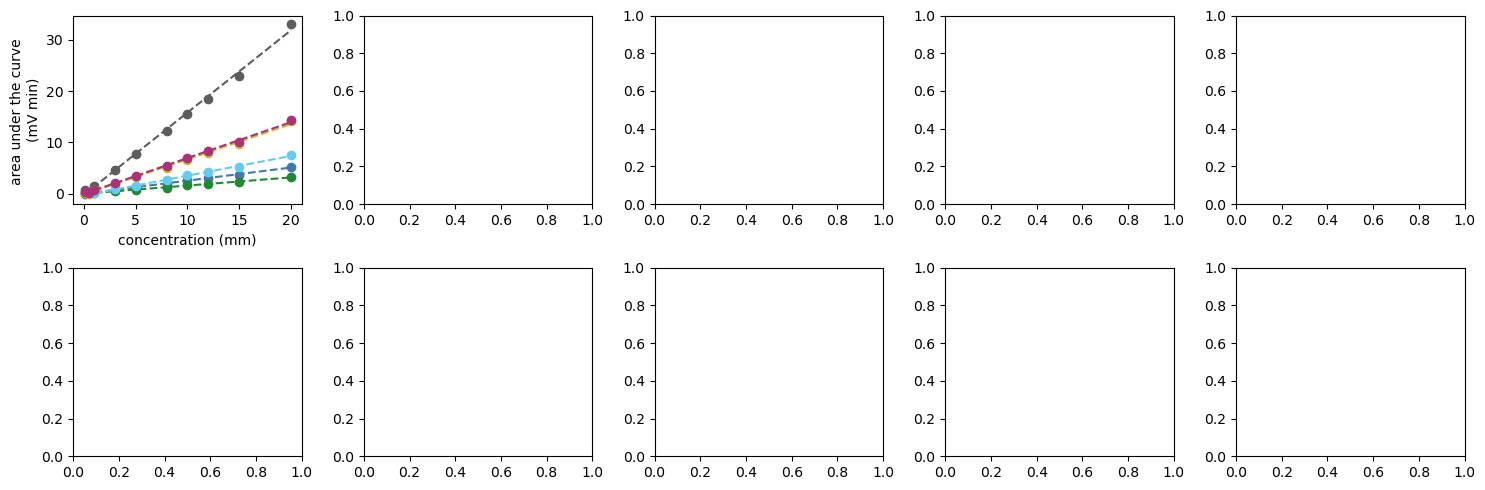

In [14]:
fig, ax = plt.subplots(2,5,figsize=(5*3,2*2.5))  #for barplots yields/excretion
    
        
ic=-1
for sub in sublist:
    ic=ic+1
    cfactor=cfactorlist[ic]
    color=colorlist[ic]
    label=sublistshort[ic]
    curdata=pd.read_csv("data_hplc/example_calibration/calibrationYCA_Zurich_"+sub+"_2308.csv")
    #display(curdata)
    if sub in ["maltose","butyrate"]:
        pass
    else:
        ax[0,0].plot(curdata["concentration"],curdata["area"],color=color,marker='o',ls='')
        ax[0,0].set_xlabel("concentration (mm)")
        ax[0,0].set_ylabel("area under the curve \n(mV min)")

        fit=np.polyfit(curdata["concentration"],curdata["area"],1)
        x=np.linspace(0,20,20)
        ax[0,0].plot(x,x*fit[0]+fit[1],ls='--',color=color)
fig.tight_layout()
fig.savefig("plot_output_figure1/illustration_method_hplccalibration.pdf")

# Illustration for main figure panel 1b

Plot secretion vs OD for one example

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,notes,strain,species,experiment,experiment_short,exp_number,medium,...,succinate_std,lactate_std,butyrate_std,formate_std,maltose_std,total_ferm,total_ferm_std,total_uptake,total_uptake_std,growth_rate_std
50,50,61.0,39.0,NaN,ATCC29148,B.theta,analysis_Zur_Newruns_2023_June,analysis_Zur_Newruns_2023_June,43,YCA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


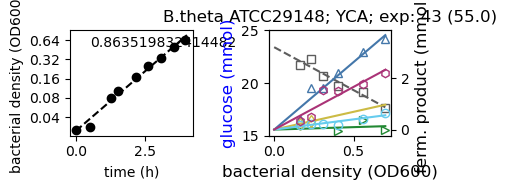

,time_min,step,intensity_mV
0,0.016667,1.0,-0.076500
1,0.033333,1.0,-0.077125
2,0.050000,1.0,-0.077125
3,0.066667,1.0,-0.077125
4,0.083333,1.0,-0.076875
...,...,...,...
2395,39.933333,1.0,0.002125
2396,39.950000,1.0,0.002250
2397,39.966667,1.0,0.003250
2398,39.983333,1.0,0.003875


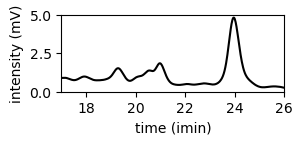

In [15]:
# Plot secrection vs OD - one curve for Fig. 2B.

#plot growth curve and OD
fig, ax = plt.subplots(1,2,figsize=(4.5,2))  #for barplots yields/excretion

######################
#plot growth rate
######################

datagr=pd.read_csv("data_HPLC/growthcurve_example.csv",skiprows=1)
datagr.columns=["time","OD","OD2"]

ax[0].set_xlabel("time (h)")
ax[0].set_ylabel("bacterial density (OD600)")
ax[0].plot(datagr["time"],datagr["OD2"],marker="o",color='k',ls="")

fitgr=np.polyfit(datagr["time"],np.log(datagr["OD2"]),1)
grv=np.linspace(0,4,10)
ax[0].plot(grv,np.exp(fitgr[0]*grv+fitgr[1]),ls='--',color='k')
ax[0].text(0.5,0.5,fitgr[0])#


#display(select)
#for iter,row in select.iterrows():
#    ax[0].scatter(row["time"],row["OD2"],marker="o",color='r')

ax[0].set_yscale("log")
ax[0].minorticks_off()
ax[0].set_yticks([0.04,0.08,0.16,0.32,0.64])
ax[0].set_yticklabels([0.04,0.08,0.16,0.32,0.64])

####################
#plot concentration vs OD
####################

##!!! ADJUST EXPENETIAL NUMBER

#B. theta runs in YCA: 35,43,53
select=dataout_av.loc[dataout_av["exp_number"]=="43"]
select=select.sort_values(by=["strain","medium"])
#for index,row in select.iterrows():
display(select)
fontsize=12
 


#plot averages
iA=-1
for index,row in select.iterrows():
    axTW=ax[1].twinx()
    #print(index)
    iA=iA+1
    axTW.set_ylabel("ferm. product (mmol)",fontsize=fontsize)
    ax[1].set_ylabel("glucose (mmol)",fontsize=fontsize,color='b')
    ax[1].set_xlabel("bacterial density (OD600)",fontsize=fontsize)
    #energycontent=np.array([0.68,0.21,0.37,.36,.33,0.52,0,0.33]) #kcal/mmol #the energy per mm for different fermentation products3
    ic=-1
    for sub in sublist:
        #print(sub)
        ic=ic+1
        cfactor=cfactorlist[ic]
        color=colorlist[ic]
        label=sublistshort[ic]
        conversionfactor=1/0.5
        #print(row[sub+"_OD"])
        #print(row[sub+"_conc"])
        if row[sub+"_OD"] in ["nan",np.nan]:
            pass
        else:
            odc=row[sub+"_OD"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
            concc=row[sub+"_conc"].replace("[","").replace("]","").replace("  "," ").replace("  "," ").strip().split(" ")
            #print(concc)
            #print(odc)
            odc=np.array(odc,dtype=float)
            concc=np.array(concc,dtype=float)
            odcval=np.linspace(0,0.7,10)
            m=row[sub]
            y0=row[sub+"_y0"]
            ax[1].set_title(row['species']+" "+row['strain']+"; "+row['medium']+"; exp: "+str(row['exp_number'])+" ("+str(row['exp_number_usedonly'])+")")
            
            if sub in ["glucose","maltose"]:
                offsetc=0
                ax[1].plot(odc,concc-offsetc,color=color,marker=markerlist[ic],ls='',label=label, fillstyle='none')
                ax[1].plot(odcval,odcval*m+y0-offsetc,color=color,ls='--')
            else:
                offsetc=y0
                axTW.plot(odc,concc-offsetc,color=color,marker=markerlist[ic],ls='',label=label, fillstyle='none')
                axTW.plot(odcval,odcval*m+y0-offsetc,color=color,ls='-')
    #if iA==0:
    #    ax[0].set_yticklabels(tickl[::-1],fontsize=fontsize)
             
ax[1].set_ylim(15,25)
#axTW.legend()
plt.tight_layout()
fig.savefig("plot_output_figure1/illustration_method_hplccurves.pdf")
plt.show()

###############
#HPLC chromatogram example
##############

chrom=pd.read_csv("data_HPLC/Erec_3_FP09_chromatogram.csv",skiprows=0)
#chrom.columns=["time","intensity"]
display(chrom)

fig, ax = plt.subplots(1,1,figsize=(3,1.5))  #for barplots yields/excretion

ax.plot(chrom["time_min"].to_numpy(),chrom["intensity_mV"],color='k')


ax.set_xlabel("time (imin)")
ax.set_ylabel("intensity (mV)")
ax.set_xlim(17,26)
#ax.set_xlim(15,36)
ax.set_ylim(0,5)
#ax.set_yscale("log")

plt.tight_layout()
fig.savefig("plot_output_figure1/illustration_method_chromatogram.pdf")
plt.show()
